# HD

## Import Librabry, view data

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("heart.csv")

In [5]:
data[data['target']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data = data.rename(columns={'age': 'Возраст', 'cp': 'Боль в груди','trestbps': 'Артериальное давление',
                           'chol': 'Холестерин', 'fbs': 'Урвоень сахара','restecg ': 'Кардиография',
                           'thalach': 'Частота пульса', 'exang ': 'Стенокардия','restecg ': 'Кардиография'})

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data['sex'] = np.where(data['sex'] == 1, 'Male', 'Female')

In [26]:
data.to_csv('heart1.csv',index=False)

In [7]:

font = {'family': 'sans-serif', 'color': '#a72693',
        'weight': 'normal',
        'size': 34, }
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 70)

## HEAD\DESCRIBE\INFO

In [7]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,Male,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,Female,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,Male,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,Male,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,Male,2,150,168,0,1,174,0,1.60,2,0,2,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [9]:
data.describe()

,Возраст,sex,Боль в груди,Артериальное давление,Холестерин,Урвоень сахара,restecg,Частота пульса,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## View with PandasProfile

In [10]:
from pandas_profiling import ProfileReport
prof=ProfileReport(data,title="Pandas Prifiling Report Report",html={'style':{'full_width':True}})

In [11]:
prof.to_file(output_file = 'output.html')

In [12]:
data = data.drop_duplicates().reset_index(drop=True)
data.shape

(302, 14)

# Visualization

## Age

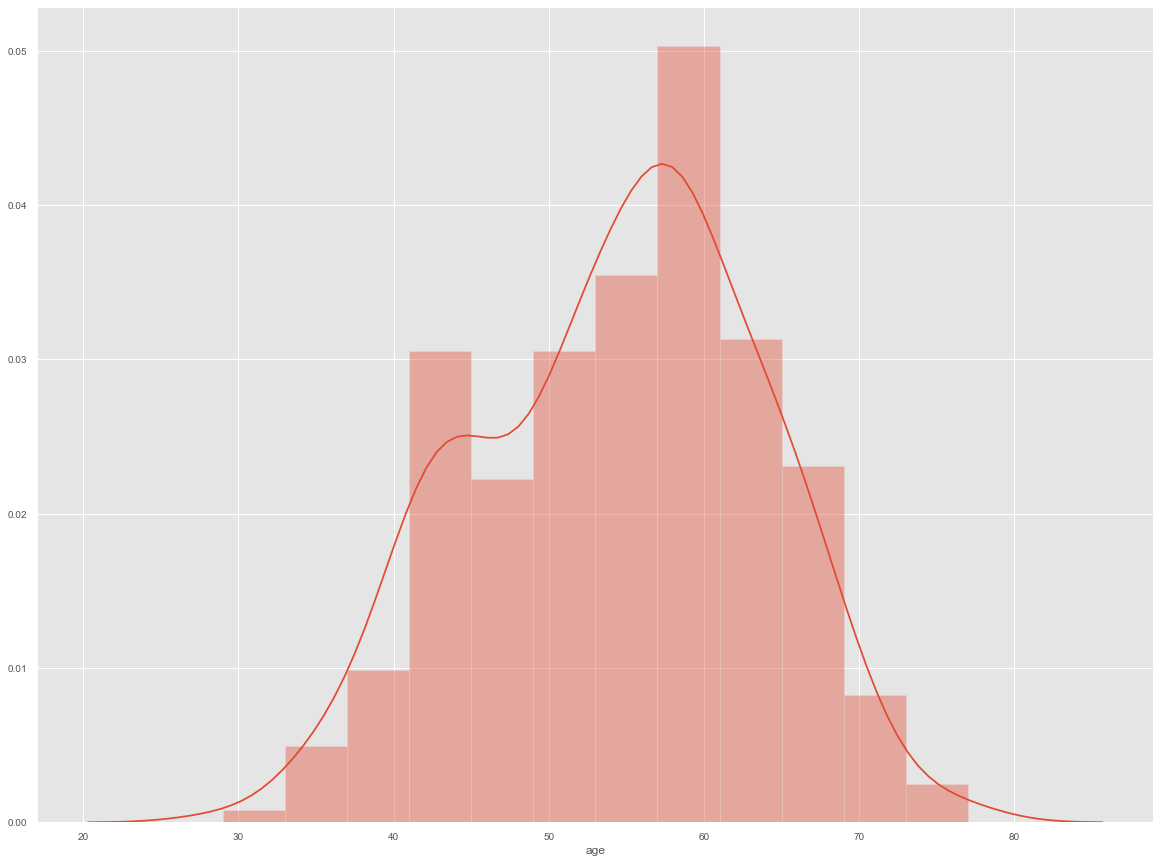

In [13]:
import cufflinks as cf
import plotly.offline
import seaborn as sns
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plt.figure(figsize=(20,15))
sns.distplot(data.age) 
# data["age"].iplot(kind="histogram")
plt.show()

In [16]:
from scipy import stats
s=stats.shapiro(data['age'])
s

ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)

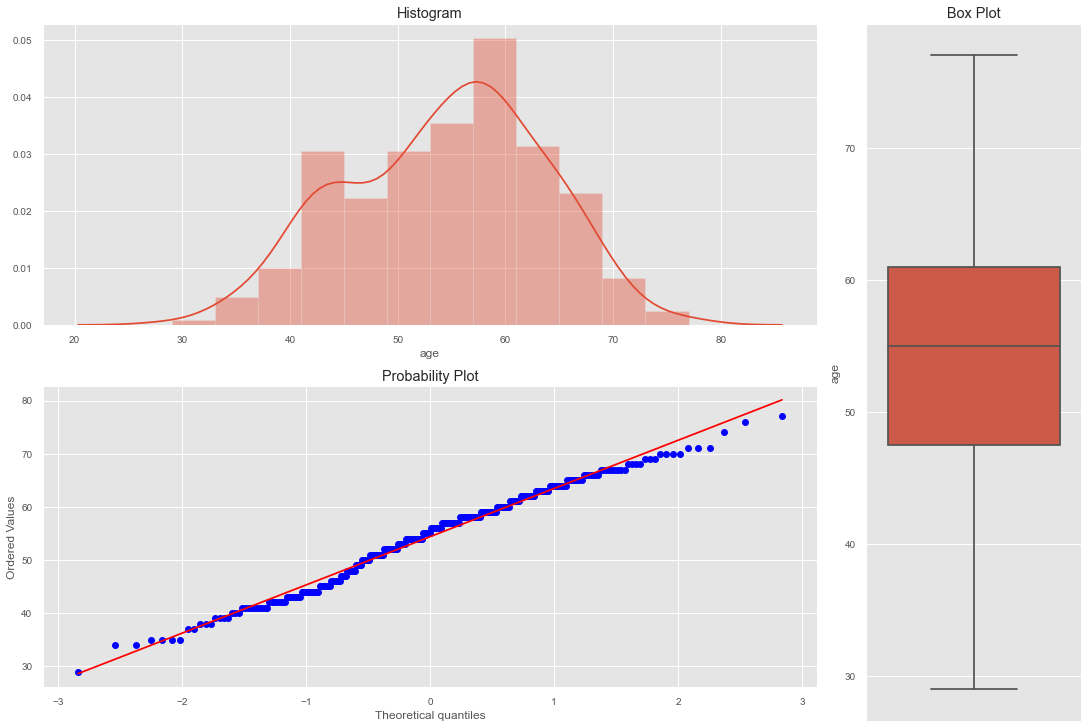

In [18]:
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
def plotting_3_chart(df, feature): 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot') 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    plt.savefig("df.png")
    
plotting_3_chart(data, 'age')

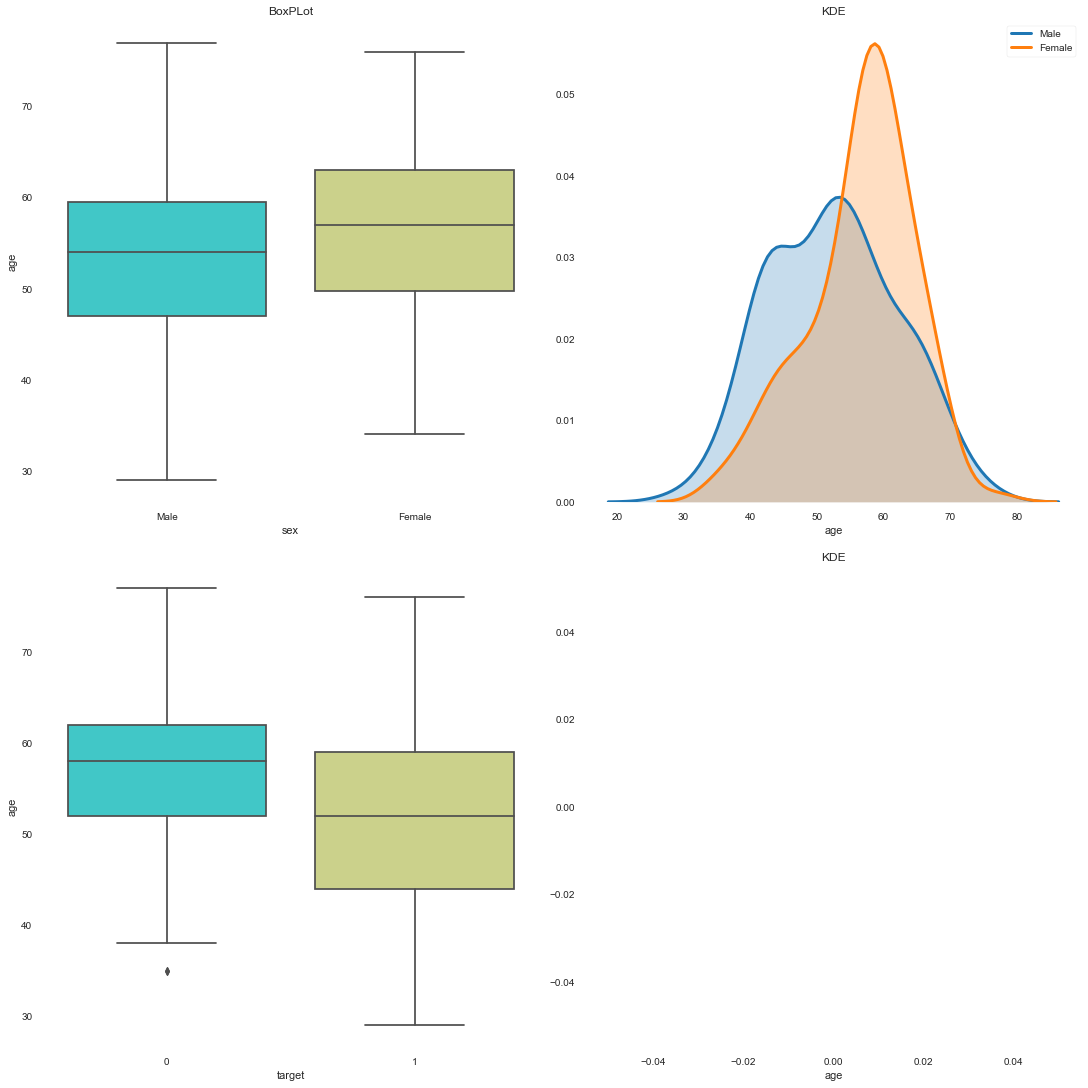

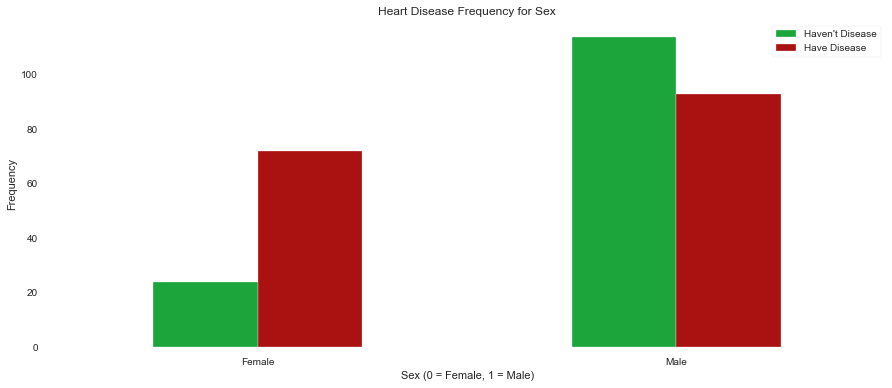

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(15,15))
grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('BoxPLot')
sns.boxplot(x="sex", y="age", data=data, palette='rainbow');
ax2 = fig.add_subplot(grid[0, 2:4])
ax2.set_title('KDE') 
sns.distplot(data[data['target']==1]['age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="Male")
sns.distplot(data[data['target']==0]['age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="Female")

ax2 = fig.add_subplot(grid[1, :2])

ax1.set_title('BoxPLot')
sns.boxplot(x="target", y="age", data=data, palette='rainbow');
ax2 = fig.add_subplot(grid[1, 2:4])

ax2.set_title('KDE') 
sns.distplot(data[data['sex']==1]['age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="Male")
sns.distplot(data[data['sex']==0]['age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label="Female")

# ax2 = fig.add_subplot(grid[2, :4])
# ax2.set_title('Count') 
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [14]:
print(stats.ttest_ind(data[data['sex']==1]['age'],data[data['sex']==0]['age']))
print(stats.ttest_ind(data[data['target']==1]['age'],data[data['target']==0]['age']))

Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05)


In [15]:
# data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
#        'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
# dt=data.copy()
# dt['sex'][dt['sex'] == 0] = 'female'
# dt['sex'][dt['sex'] == 1] = 'male'

# dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
# dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
# dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
# dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

# dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
# dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

# dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
# dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
# dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
# dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

# dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
# dt['st_slope'][dt['st_slope'] == 2] = 'flat'
# dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

# dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
# dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
# dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [16]:
# dt['sex'] = dt['sex'].astype('object')
# dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
# dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
# dt['rest_ecg'] = dt['rest_ecg'].astype('object')
# dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
# dt['st_slope'] = dt['st_slope'].astype('object')
# dt['thalassemia'] = dt['thalassemia'].astype('object')

In [17]:
# dt = pd.get_dummies(dt, drop_first=True)

In [18]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10)

# Feature engineering

In [4]:
cv_n_split = 3
random_state = 40
test_train_split_part = 0.25
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4]

In [5]:
def fe_creation(df):
    df['age2'] = df['age']//10
    df['trestbps2'] = df['trestbps']//10
    df['chol2'] = df['chol']//40
    df['thalach2'] = df['thalach']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data = fe_creation(data)

In [6]:
categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
categorical_columns

['sex',
 'sex_cp',
 'sex_trestbps2',
 'sex_chol2',
 'sex_thalach2',
 'sex_oldpeak2',
 'sex_slope',
 'sex_ca',
 'age2_cp',
 'age2_trestbps2',
 'age2_chol2',
 'age2_thalach2',
 'age2_oldpeak2',
 'age2_slope',
 'age2_ca',
 'fbs_cp',
 'fbs_trestbps2',
 'fbs_chol2',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_trestbps2',
 'restecg_chol2',
 'restecg_thalach2',
 'restecg_oldpeak2',
 'restecg_slope',
 'restecg_ca',
 'exang_cp',
 'exang_trestbps2',
 'exang_chol2',
 'exang_thalach2',
 'exang_oldpeak2',
 'exang_slope',
 'exang_ca',
 'thal_cp',
 'thal_trestbps2',
 'thal_chol2',
 'thal_thalach2',
 'thal_oldpeak2',
 'thal_slope',
 'thal_ca']

In [7]:
data['oldpeak2'].unique()

array([ 5.,  8.,  3.,  2.,  1.,  0.,  4.,  6.,  7., 10., 15.,  9., 13.,
       11.])

In [8]:
encoders = {}
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
        encoders = le
encoders

LabelEncoder()

# Preparing to modeling

In [9]:
target_name = 'target'
target0 = data[target_name]
train0 = data.drop([target_name], axis=1)

In [10]:
# For boosting model
train0b = train0.copy()
# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)

In [11]:
#For models from Sklearn
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
scaler2 = StandardScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)


In [12]:
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)

In [13]:
num_models = 16
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [14]:
acc_all

[[], [], [], [], [], [], [], []]

In [15]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [16]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2

In [17]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)

# Classify

In [18]:
# Thanks to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
plt.style.use('ggplot')
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):

    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")
    plt.savefig("lin1.png")
    plt.show()
    plt.savefig("lin.png")
    return

## Linear Regression

In [19]:
linreg = LinearRegression()
linreg_CV = GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(train, target)
acc_metrics_calc(0,linreg_CV,train,test,target,target_test)

target =  [1 0 0 1 0]
ytrain =  [0 0 0 0 0]
target_test = [1 1 1 0 1]
ytest = [0 0 0 0 0]
acc of r2_score for train = -75.68
acc of r2_score for test = -91.6
acc of acc for train = 56.39
acc of acc for test = 52.63
acc of rmse for train = 66.04
acc of rmse for test = 68.82
acc of re for train = 80.49
acc of re for test = 85.71


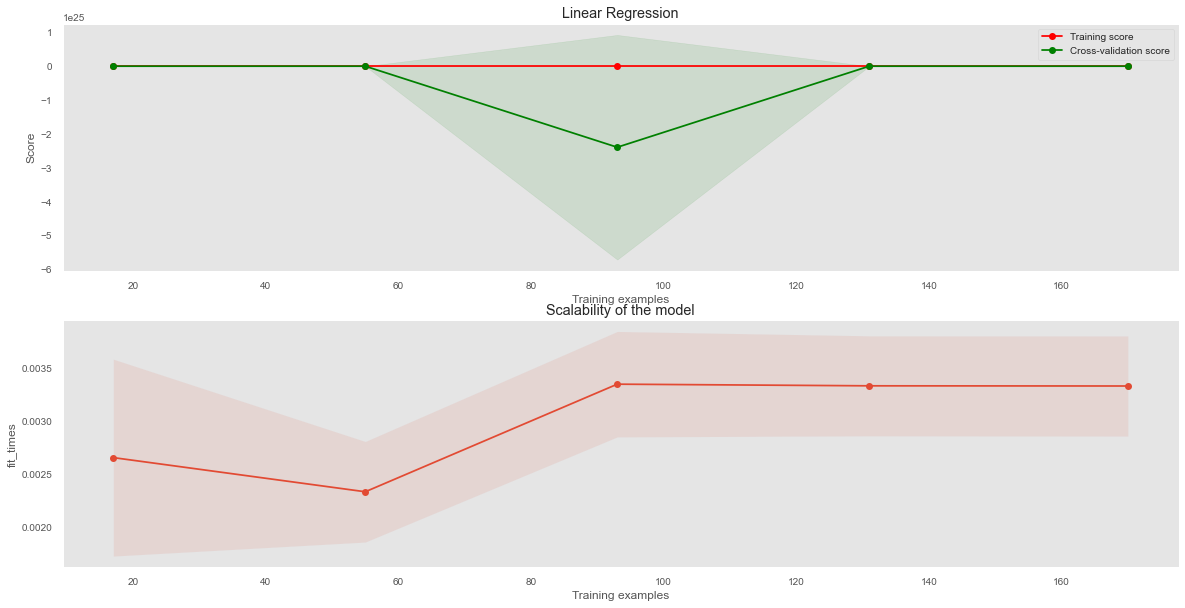

<Figure size 432x288 with 0 Axes>

In [20]:
plot_learning_curve(linreg, "Linear Regression", train, target, cv=cv_train)

## SVC

In [26]:
svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

{'kernel': 'sigmoid', 'tol': 0.001}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 21.92
acc of r2_score for test = 57.42
acc of acc for train = 80.62
acc of acc for test = 89.47
acc of rmse for train = 44.03
acc of rmse for test = 32.44
acc of re for train = 35.77
acc of re for test = 19.05


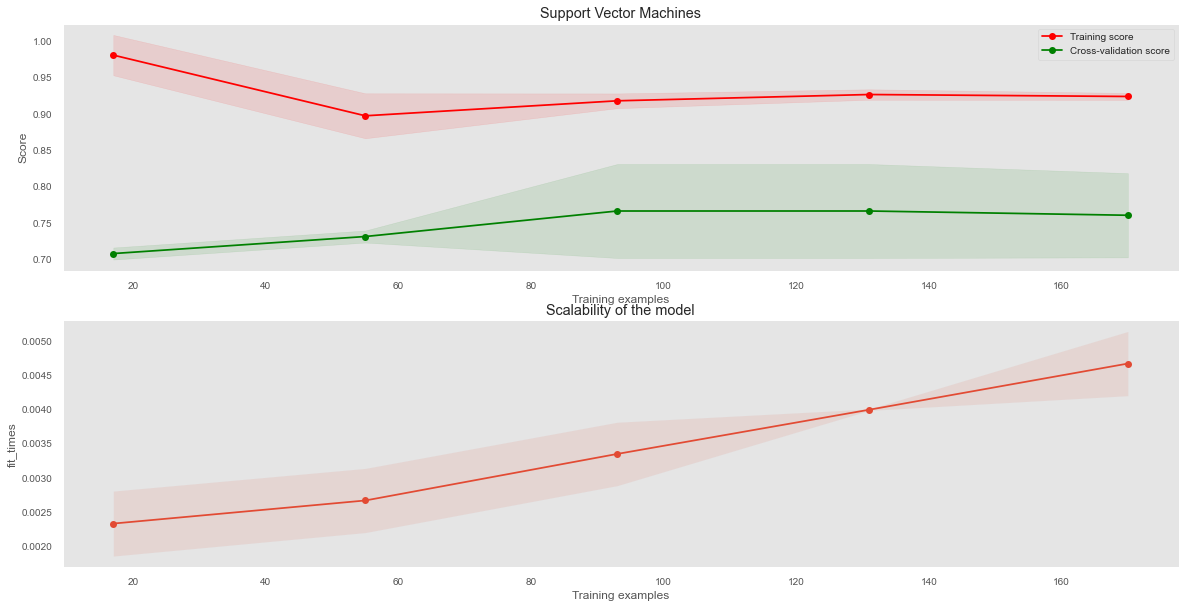

In [56]:
plot_learning_curve(svr, "Support Vector Machines", train, target, cv=cv_train)

## Lin SVC

In [147]:
linear_svc = LinearSVC()
param_grid = {'dual':[False],
              'C': np.linspace(1, 15, 15)}
linear_svc_CV = GridSearchCV(linear_svc, param_grid=param_grid, cv=cv_train, verbose=False)
linear_svc_CV.fit(train, target)
print(linear_svc_CV.best_params_)
acc_metrics_calc(2,linear_svc_CV,train,test,target,target_test)

{'C': 1.0, 'dual': False}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 44.99
acc of r2_score for test = 52.1
acc of acc for train = 86.34
acc of acc for test = 88.16
acc of rmse for train = 36.95
acc of rmse for test = 34.41
acc of re for train = 25.2
acc of re for test = 21.43


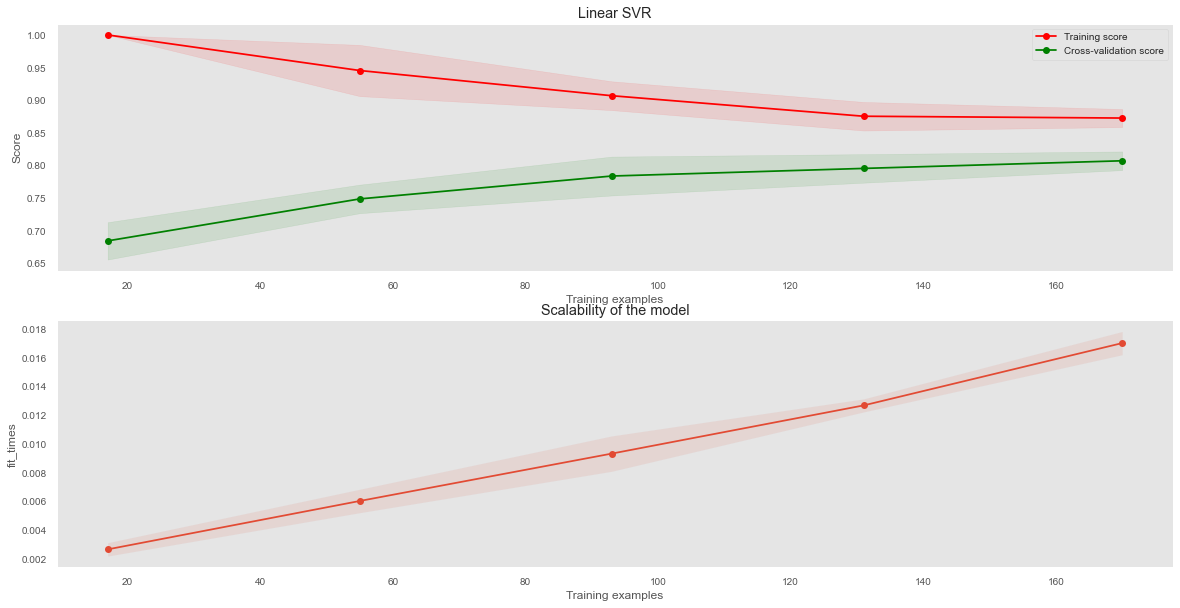

In [58]:
plot_learning_curve(linear_svc, "Linear SVR", train, target, cv=cv_train)

## mlp

In [148]:
mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(3,mlp_GS,train,test,target,target_test)

{'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 50.31
acc of r2_score for test = 52.1
acc of acc for train = 87.67
acc of acc for test = 88.16
acc of rmse for train = 35.12
acc of rmse for test = 34.41
acc of re for train = 22.76
acc of re for test = 21.43


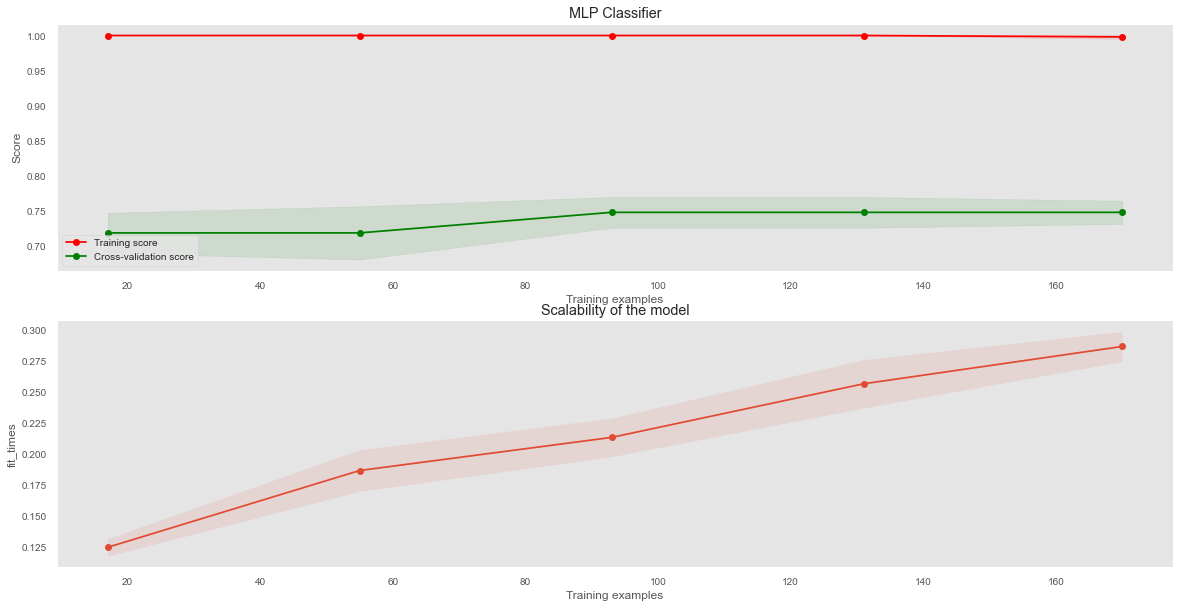

In [60]:
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

## SGDClassifier

In [150]:
sgd = SGDClassifier(early_stopping=True) 
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(train, target)
print(sgd_CV.best_params_)
acc_metrics_calc(4,sgd_CV,train,test,target,target_test)

{'alpha': 0.035}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 34.34
acc of r2_score for test = 46.78
acc of acc for train = 83.7
acc of acc for test = 86.84
acc of rmse for train = 40.37
acc of rmse for test = 36.27
acc of re for train = 30.08
acc of re for test = 23.81


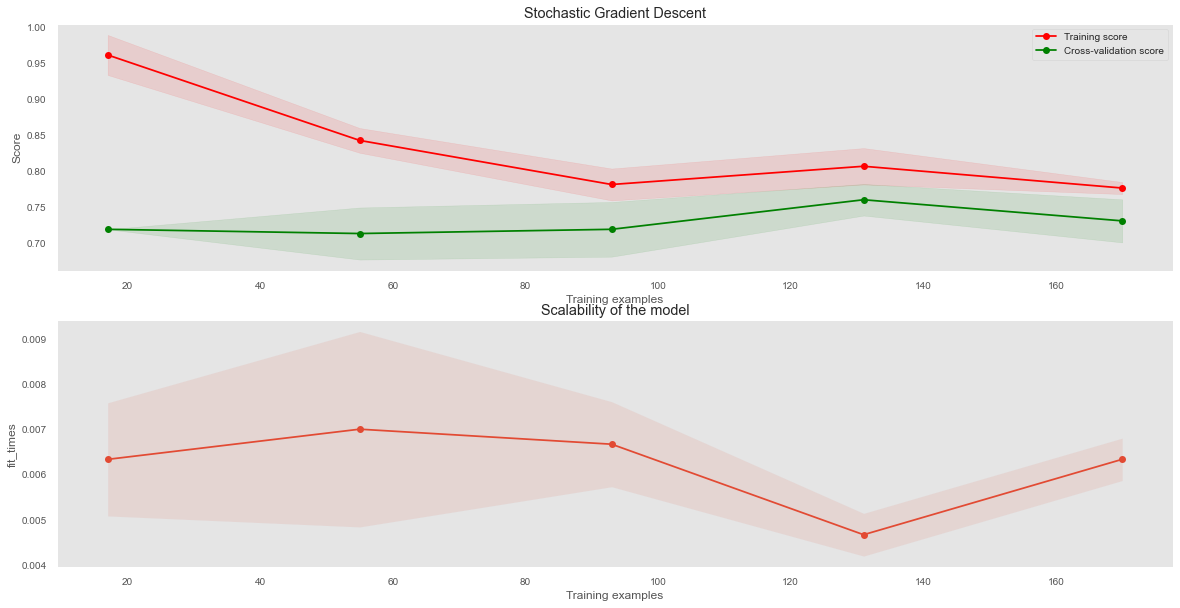

In [62]:
plot_learning_curve(sgd, "Stochastic Gradient Descent", train, target, cv=cv_train)

## DecisionTreeClassifier

In [151]:
decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(5,decision_tree_CV,train,test,target,target_test)

{'min_samples_leaf': 2}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 82.25
acc of r2_score for test = 14.85
acc of acc for train = 95.59
acc of acc for test = 78.95
acc of rmse for train = 20.99
acc of rmse for test = 45.88
acc of re for train = 8.13
acc of re for test = 38.1


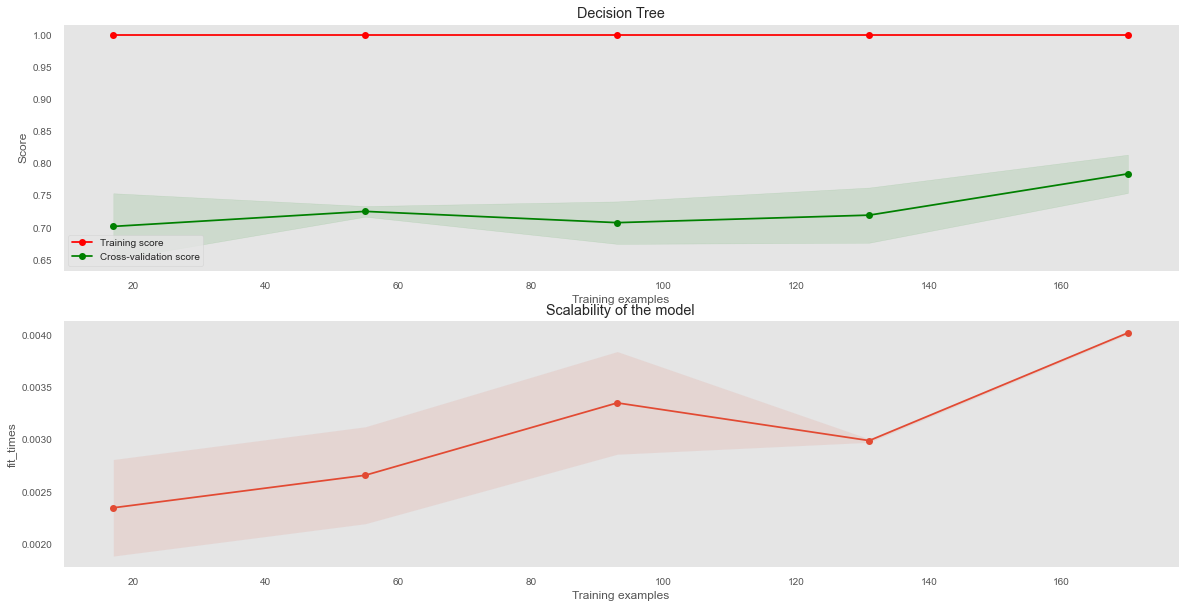

In [64]:
plot_learning_curve(decision_tree, "Decision Tree", train, target, cv=cv_train)

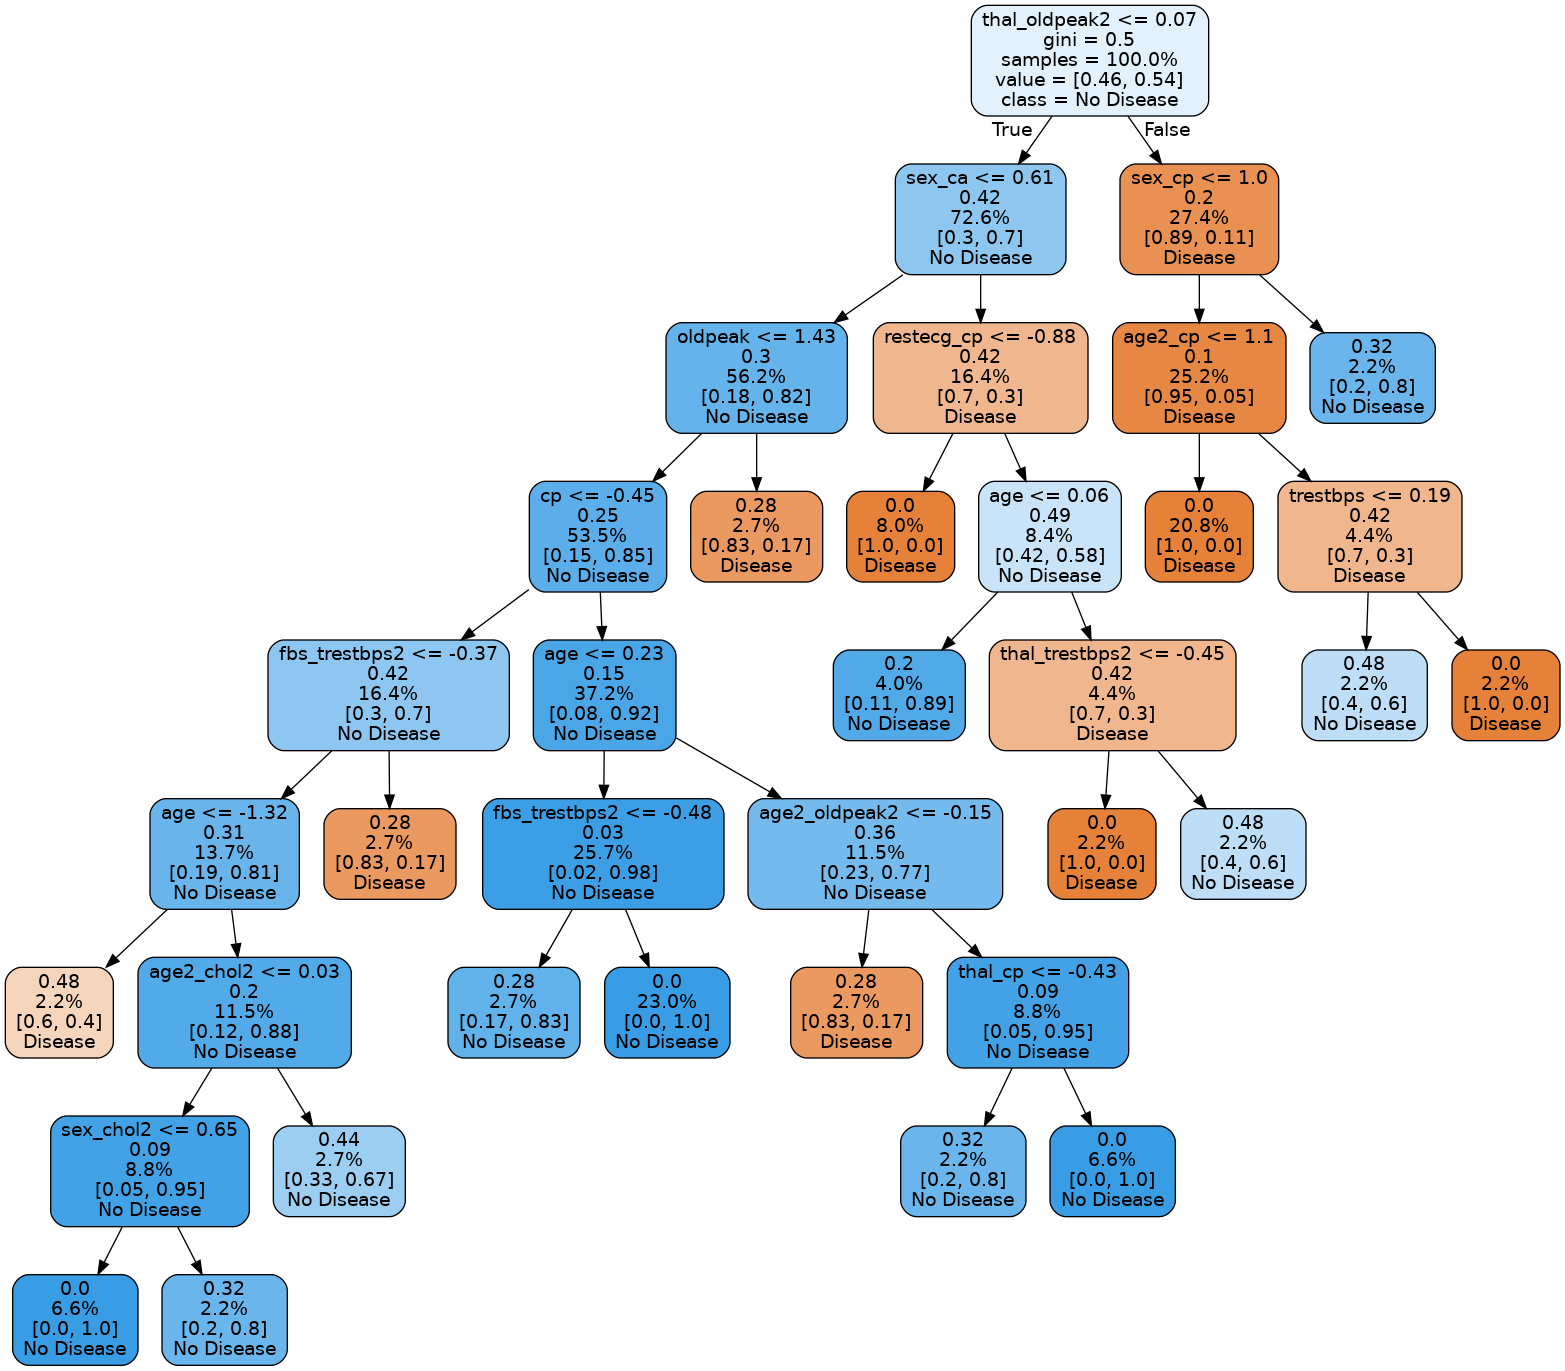

In [65]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_CV.best_estimator_, out_file='tree.dot', 
                feature_names = train.columns.tolist(),
                class_names = ['Disease','No Disease'],
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# terminal dot -Tpng tree.dot -о tree.png

# from subprocess import call
# call(['ls'])
# #call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

## Random forest

In [152]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
acc_metrics_calc(6,random_forest_CV,train,test,target,target_test)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 50, 'n_estimators': 40}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 0 1 0 1]
acc of r2_score for train = 46.76
acc of r2_score for test = 30.81
acc of acc for train = 86.78
acc of acc for test = 82.89
acc of rmse for train = 36.35
acc of rmse for test = 41.36
acc of re for train = 24.39
acc of re for test = 30.95


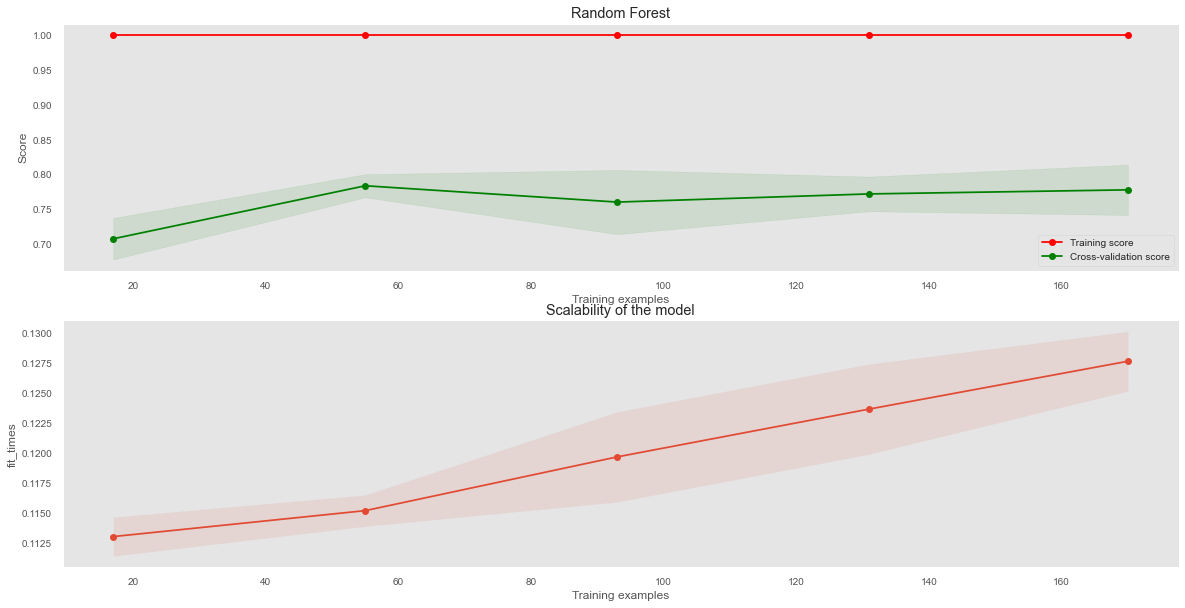

In [67]:
plot_learning_curve(random_forest, "Random Forest", train, target, cv=cv_train)

## XGB Classifier

In [154]:
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(7,xgb_reg,trainb,testb,targetb,target_testb)

Best score: 0.807
Best parameters set: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 80}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 100.0
acc of r2_score for test = 36.13
acc of acc for train = 100.0
acc of acc for test = 84.21
acc of rmse for train = 0.0
acc of rmse for test = 39.74
acc of re for train = 0.0
acc of re for test = 28.57


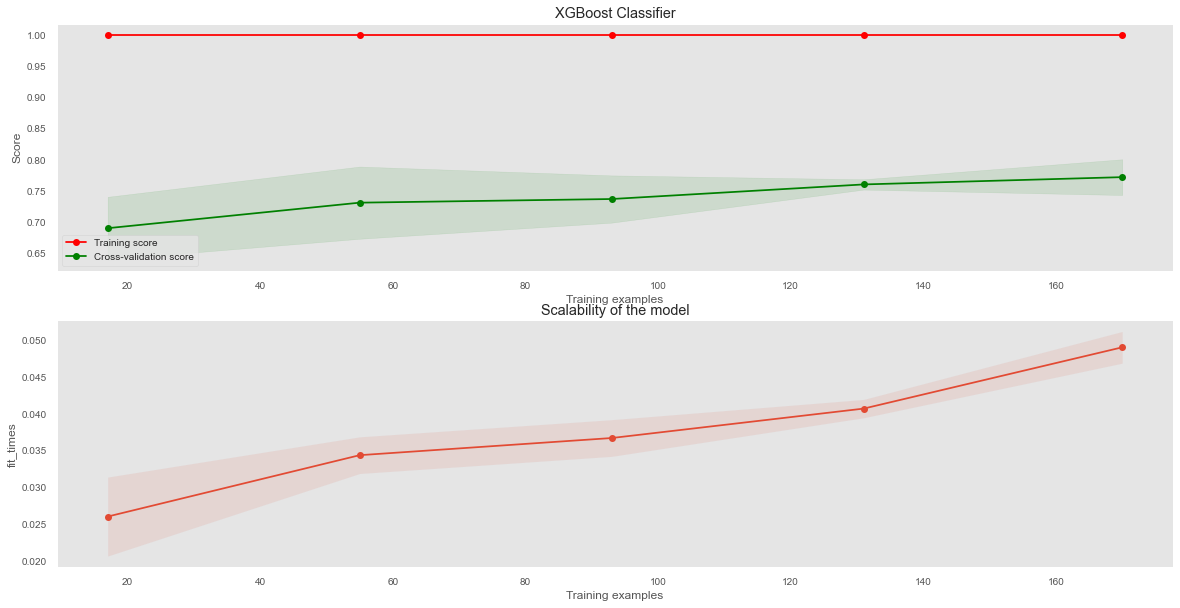

In [69]:
plot_learning_curve(xgb_clf, "XGBoost Classifier", trainb, targetb, cv=cv_train)

## LGBM

In [156]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=test_train_split_part, random_state=random_state)
modelL = lgb.LGBMClassifier(n_estimators=1000, max_depth=6, num_leaves=30)
modelL.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], early_stopping_rounds=50, verbose=True)

[1]	valid_0's binary_logloss: 0.639976
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.609211
[3]	valid_0's binary_logloss: 0.579897
[4]	valid_0's binary_logloss: 0.560845
[5]	valid_0's binary_logloss: 0.54512
[6]	valid_0's binary_logloss: 0.522762
[7]	valid_0's binary_logloss: 0.504622
[8]	valid_0's binary_logloss: 0.486005
[9]	valid_0's binary_logloss: 0.472197
[10]	valid_0's binary_logloss: 0.458534
[11]	valid_0's binary_logloss: 0.447235
[12]	valid_0's binary_logloss: 0.434269
[13]	valid_0's binary_logloss: 0.425482
[14]	valid_0's binary_logloss: 0.416591
[15]	valid_0's binary_logloss: 0.411112
[16]	valid_0's binary_logloss: 0.408168
[17]	valid_0's binary_logloss: 0.403729
[18]	valid_0's binary_logloss: 0.398119
[19]	valid_0's binary_logloss: 0.393663
[20]	valid_0's binary_logloss: 0.387627
[21]	valid_0's binary_logloss: 0.37937
[22]	valid_0's binary_logloss: 0.370562
[23]	valid_0's binary_logloss: 0.364308
[24]	valid_0's binary_logloss:

LGBMClassifier(max_depth=6, n_estimators=1000, num_leaves=30)

In [157]:
acc_metrics_calc(8,modelL,trainb,testb,targetb,target_testb)

target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 71.61
acc of r2_score for test = 46.78
acc of acc for train = 92.95
acc of acc for test = 86.84
acc of rmse for train = 26.55
acc of rmse for test = 36.27
acc of re for train = 13.01
acc of re for test = 23.81


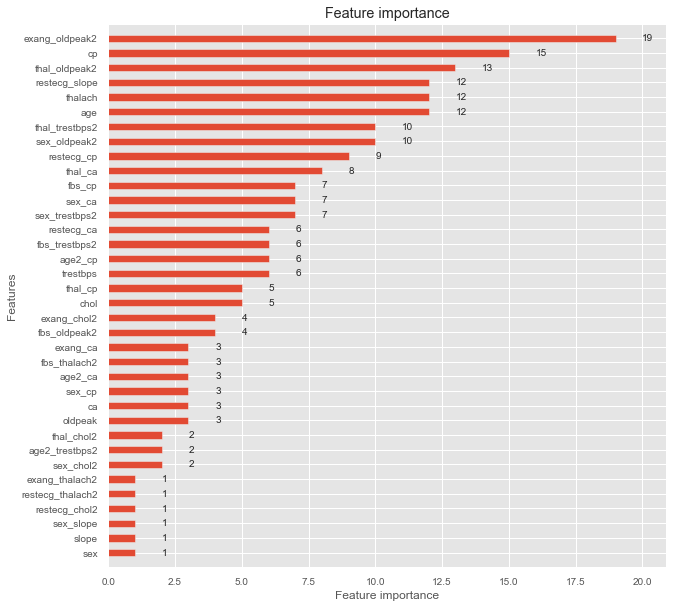

In [72]:
fig =  plt.figure(figsize = (10,10))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

## Gradient boosting

In [159]:
gradient_boosting = GradientBoostingClassifier() 
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False)
gradient_boosting_CV.fit(train, target)
print(gradient_boosting_CV.best_params_)
acc_metrics_calc(9,gradient_boosting_CV,train,test,target,target_test)

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 5}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 100.0
acc of r2_score for test = 36.13
acc of acc for train = 100.0
acc of acc for test = 84.21
acc of rmse for train = 0.0
acc of rmse for test = 39.74
acc of re for train = 0.0
acc of re for test = 28.57


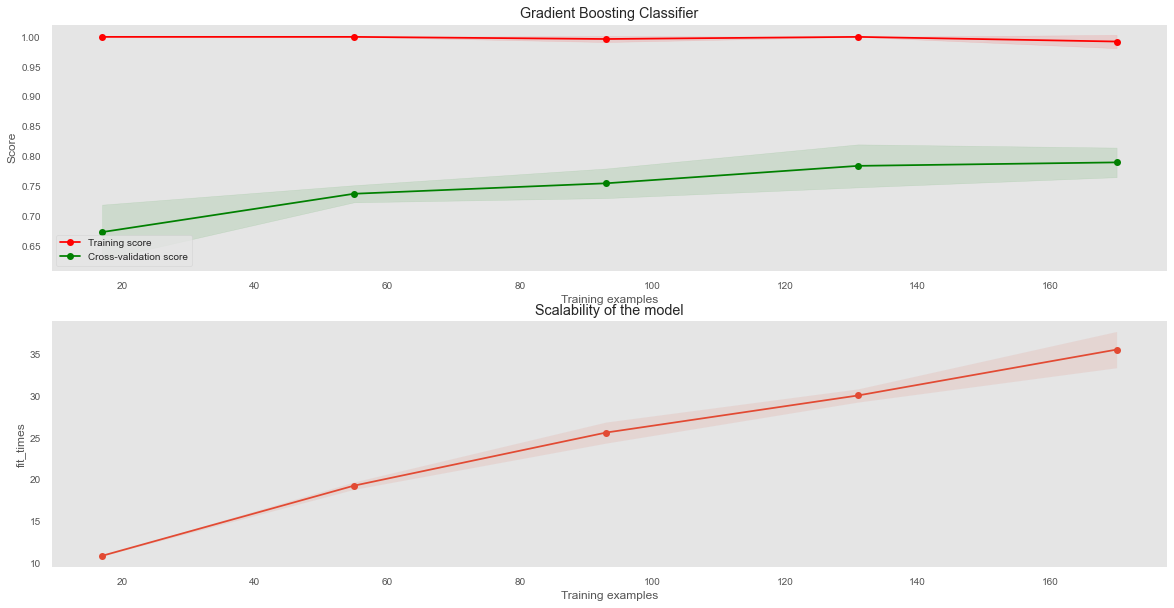

In [74]:
plot_learning_curve(gradient_boosting_CV, "Gradient Boosting Classifier", train, target, cv=cv_train)

## Extra tree

In [160]:
etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=False)
etr_CV.fit(train, target)
print(etr_CV.best_params_)
acc_metrics_calc(10,etr_CV,train,test,target,target_test)

{'min_samples_leaf': 11}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 37.89
acc of r2_score for test = 52.1
acc of acc for train = 84.58
acc of acc for test = 88.16
acc of rmse for train = 39.27
acc of rmse for test = 34.41
acc of re for train = 28.46
acc of re for test = 21.43


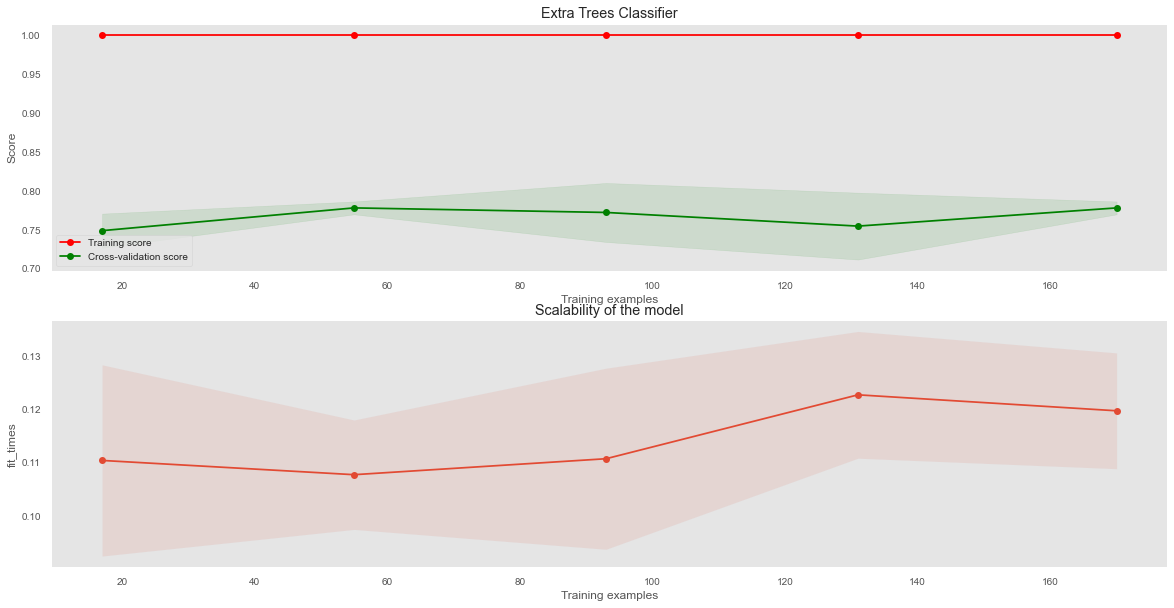

In [76]:
plot_learning_curve(etr, "Extra Trees Classifier", train, target, cv=cv_train)

## AdaBoost Classifier

In [161]:
Ada_Boost = AdaBoostClassifier()
Ada_Boost_CV = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.101, 0.102, 0.105]}, cv=cv_train, verbose=False)
Ada_Boost_CV.fit(train, target)
print(Ada_Boost_CV.best_params_)
acc_metrics_calc(11,Ada_Boost_CV,train,test,target,target_test)

{'learning_rate': 0.1}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 43.21
acc of r2_score for test = 57.42
acc of acc for train = 85.9
acc of acc for test = 89.47
acc of rmse for train = 37.55
acc of rmse for test = 32.44
acc of re for train = 26.02
acc of re for test = 19.05


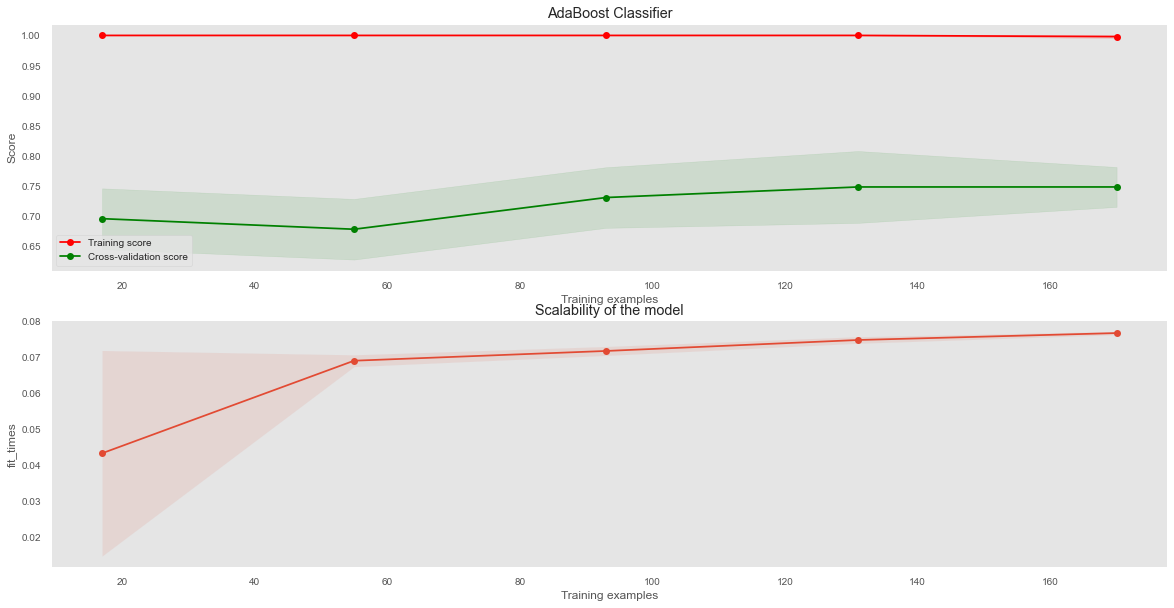

In [78]:
plot_learning_curve(Ada_Boost, "AdaBoost Classifier", train, target, cv=cv_train)

## Logistic Regression

In [162]:
logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv_train, verbose=False)
logreg_CV.fit(train, target)
print(logreg_CV.best_params_)
acc_metrics_calc(12,logreg_CV,train,test,target,target_test)

{'C': 0.3}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 36.12
acc of r2_score for test = 57.42
acc of acc for train = 84.14
acc of acc for test = 89.47
acc of rmse for train = 39.82
acc of rmse for test = 32.44
acc of re for train = 29.27
acc of re for test = 19.05


In [80]:
type(train.iloc[1,:])
logreg_CV.predict_proba(train[train.index==1])

array([[0.43646403, 0.56353597]])

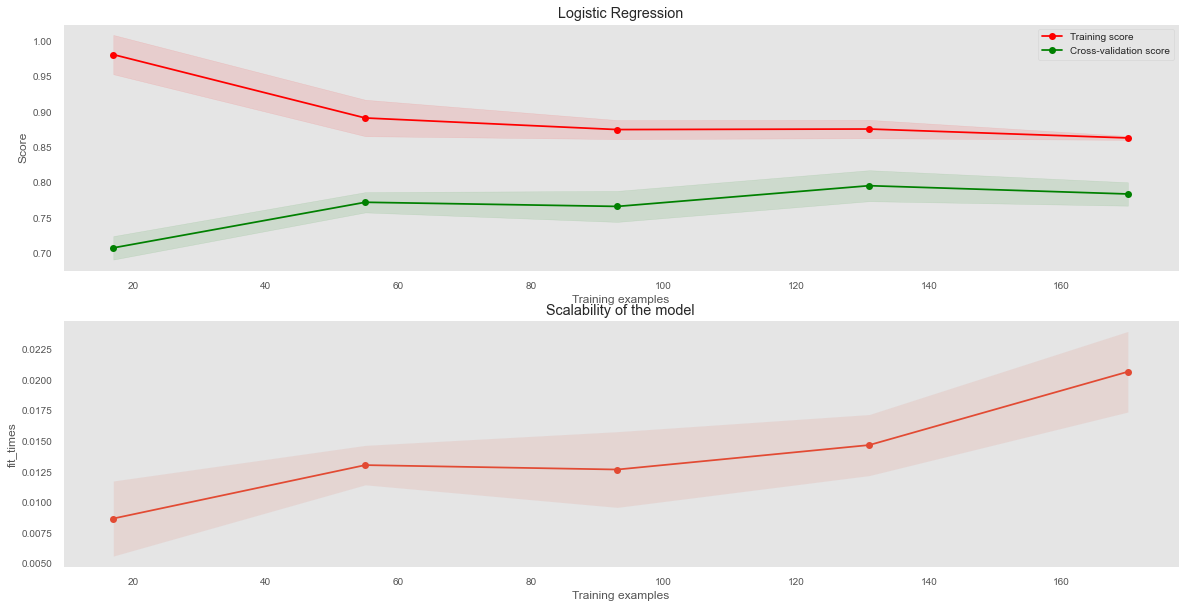

In [81]:
plot_learning_curve(logreg, "Logistic Regression", train, target, cv=cv_train)

## k-Nearest Neighbors (KNN)

In [163]:
knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 7)}, 
                      cv=cv_train, verbose=False).fit(train, target)
print(knn_CV.best_params_)
acc_metrics_calc(13,knn_CV,train,test,target,target_test)

{'n_neighbors': 4}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 39.67
acc of r2_score for test = 20.17
acc of acc for train = 85.02
acc of acc for test = 80.26
acc of rmse for train = 38.7
acc of rmse for test = 44.43
acc of re for train = 27.64
acc of re for test = 35.71


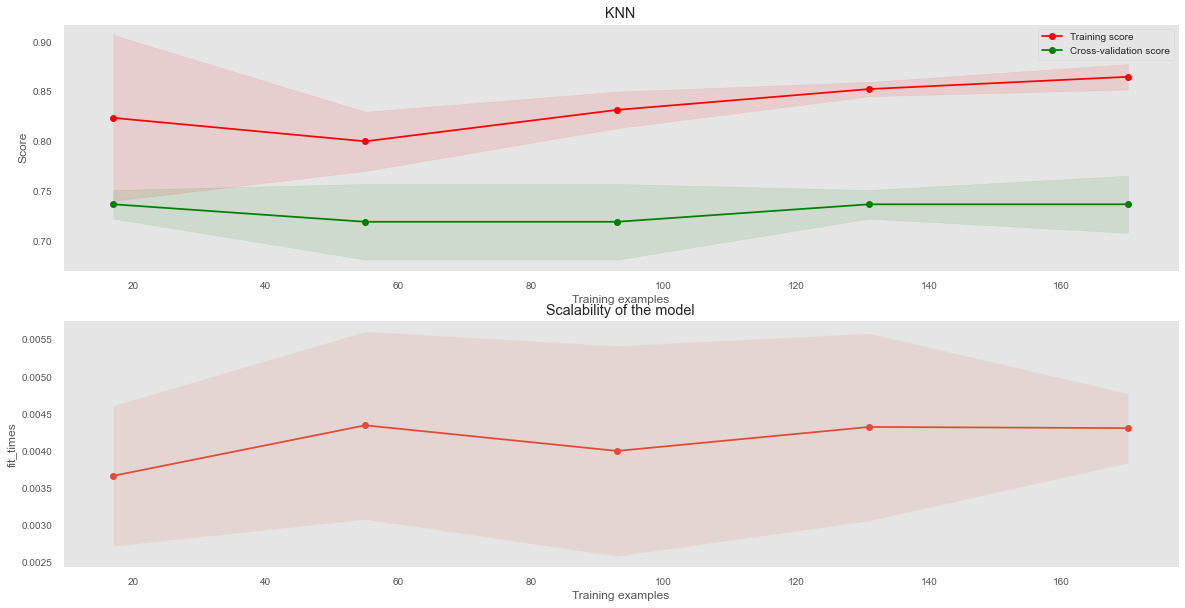

In [83]:
plot_learning_curve(knn, "KNN", train, target, cv=cv_train)

## Naive Bayes 

In [164]:
gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False)
gaussian_CV.fit(train, target)
print(gaussian_CV.best_params_)
acc_metrics_calc(14,gaussian_CV,train,test,target,target_test)

{'var_smoothing': 0.0001}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 0 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 20.15
acc of r2_score for test = 41.46
acc of acc for train = 80.18
acc of acc for test = 85.53
acc of rmse for train = 44.52
acc of rmse for test = 38.04
acc of re for train = 36.59
acc of re for test = 26.19


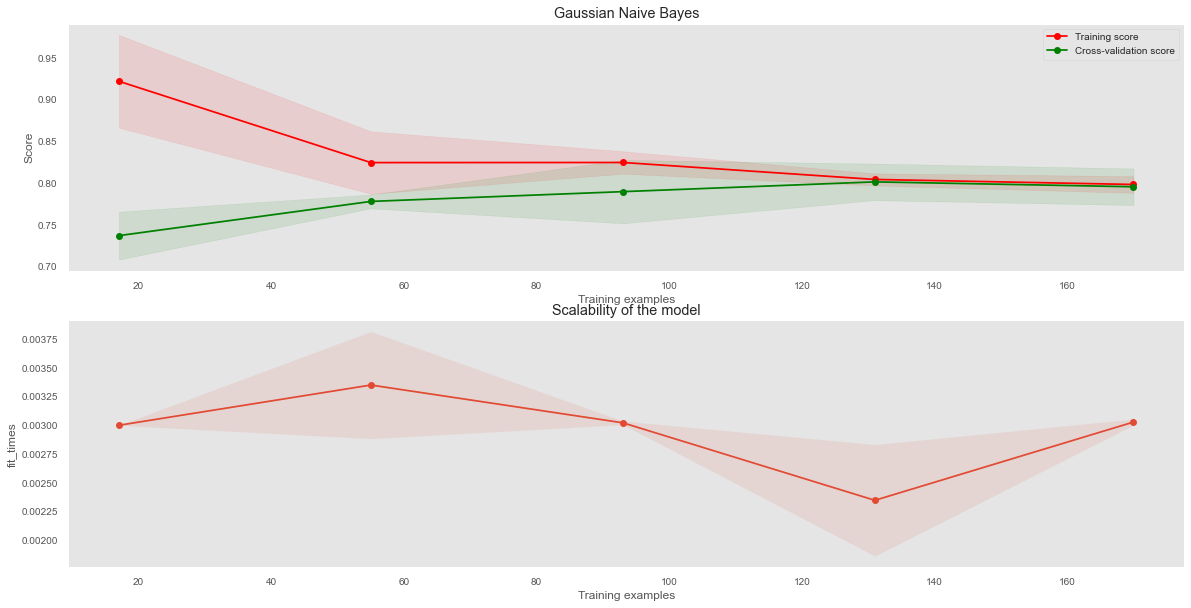

In [85]:
plot_learning_curve(gaussian, "Gaussian Naive Bayes", train, target, cv=cv_train)

## Voting

In [188]:
Voting_ens = VotingClassifier(estimators=[('log', logreg_CV), ('mlp', mlp_GS ), ('Ada', Ada_Boost_CV),
                                         ('lgb', modelL),('gbm',gradient_boosting_CV),('extra',etr_CV)],voting='soft')
Voting_ens.fit(train, target)
acc_metrics_calc(15,Voting_ens,train,test,target,target_test)

target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [1 1 1 0 1]
ytest = [1 1 1 0 1]
acc of r2_score for train = 89.35
acc of r2_score for test = 46.78
acc of acc for train = 97.36
acc of acc for test = 86.84
acc of rmse for train = 16.26
acc of rmse for test = 36.27
acc of re for train = 4.88
acc of re for test = 23.81


In [191]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVC', 
              'MLPClassifier', 'Stochastic Gradient Decent', 
              'Decision Tree Classifier', 'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'ExtraTreesClassifier', 
              'AdaBoostClassifier', 'Logistic Regression',
              'KNN', 'Naive Bayes',  'VotingClassifier','VotingClassifier2']})

for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']

In [192]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)

Prediction accuracy for models


,Model,acc_train,acc_test,acc_diff
11,AdaBoostClassifier,85.90,89.47,-3.57
12,Logistic Regression,84.14,89.47,-5.33
1,Support Vector Machines,80.62,89.47,-8.85
3,MLPClassifier,87.67,88.16,-0.49
2,Linear SVC,86.34,88.16,-1.82
10,ExtraTreesClassifier,84.58,88.16,-3.58
16,VotingClassifier2,97.36,86.84,10.52
8,LGBMClassifier,92.95,86.84,6.11
4,Stochastic Gradient Decent,83.70,86.84,-3.14
15,VotingClassifier,85.90,85.53,0.37


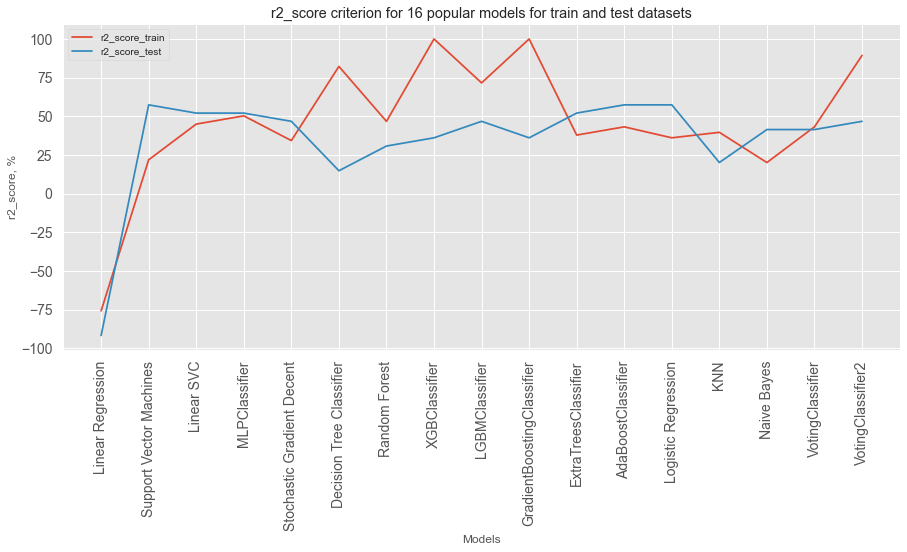

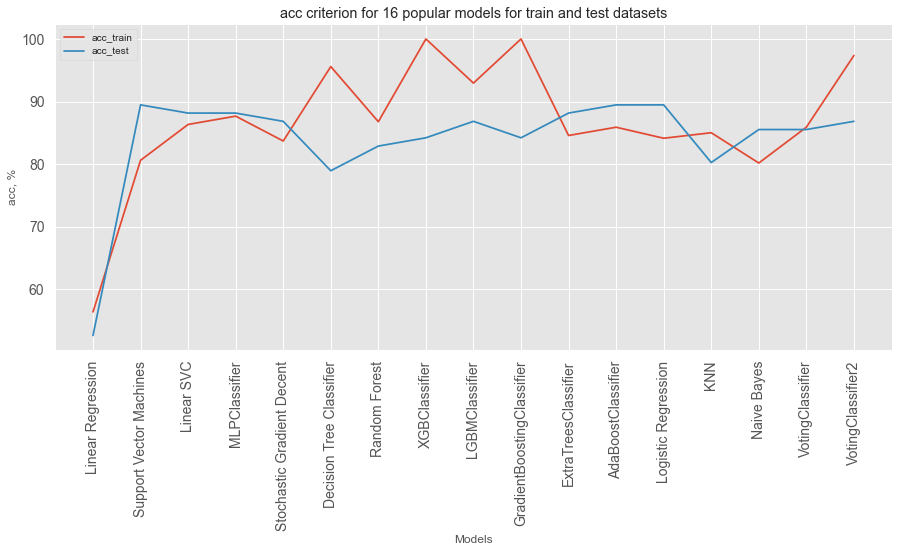

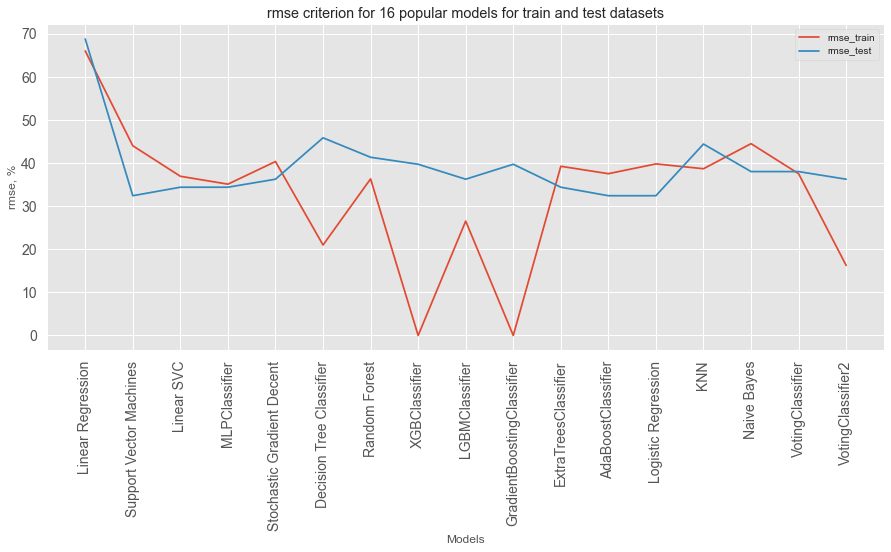

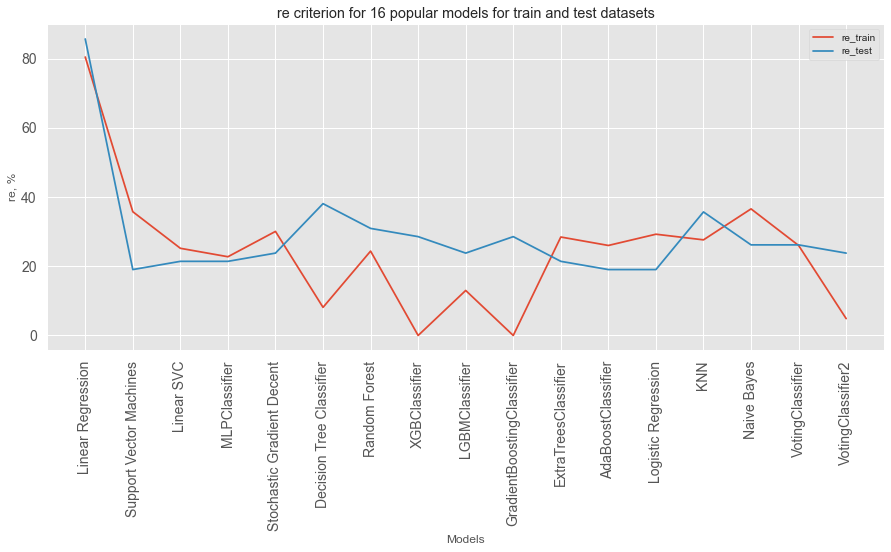

In [193]:
for x in metrics_now:   
    # Plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + '_train'
    xs_test = metrics_all[x] + '_test'
    plt.figure(figsize=[15,6])
    xx = models['Model']
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], label = xs_train)
    plt.plot(xx, models[xs_test], label = xs_test)
    plt.legend()
    plt.title(str(xs) + ' criterion for ' + str(num_models) + ' popular models for train and test datasets')
    plt.xlabel('Models')
    plt.ylabel(xs + ', %')
    plt.xticks(xx, rotation='vertical')
    plt.show()

# Conclusion

In [194]:
metrics_main = 2 
xs = metrics_all[metrics_main]
xs_train = metrics_all[metrics_main] + '_train'
xs_test = metrics_all[metrics_main] + '_test'
print('The best models by the',xs,'criterion:')
direct_sort = False if (metrics_main >= 2) else True
models_sort = models.sort_values(by=[xs_test, xs_train], ascending=direct_sort)

The best models by the acc criterion:


In [195]:
models_best = models_sort[(models_sort.acc_diff < 10) & (models_sort.acc_train > 80)]
models_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

,Model,acc_train,acc_test
11,AdaBoostClassifier,85.90,89.47
12,Logistic Regression,84.14,89.47
1,Support Vector Machines,80.62,89.47
3,MLPClassifier,87.67,88.16
2,Linear SVC,86.34,88.16
10,ExtraTreesClassifier,84.58,88.16
8,LGBMClassifier,92.95,86.84
4,Stochastic Gradient Decent,83.70,86.84
15,VotingClassifier,85.90,85.53
14,Naive Bayes,80.18,85.53


In [196]:
import joblib
import os

def save_model(model,name):
    os.makedirs("model", exist_ok=True)
    assert(len(model)==len(name))
    for i,j in zip(model,name):
        path=os.path.join("model",j)
        joblib.dump(i,path)
        
model=[modelL, logreg_CV, Ada_Boost_CV, gradient_boosting_CV,etr_CV ]
name=["modelL.pkl", "logreg.pkl", "Ada_Boost.pkl"," gradient_boosting.pkl","etr_CV.cv"]
save_model(model,name)

In [175]:
input_data = {
        "age": 63,
        "sex": 1,
        "cp": 3,
        "trestbps": 145,
        "chol": 233,
        "fbs": 1,
        "restecg": 0,
        "thalach": 150,
        "exang": 0,
        "oldpeak": 2.3,
        "slope": 0,
        "ca": 0,
        "thal": 1,
    }
input_data = pd.DataFrame(input_data, index=[0])
 {
   "age": 63,
   "sex": 1,
   "cp": 3,
   "trestbps": 145,
   "chol": 233,
   "fbs": 1,
   "restecg": 0,
   "thalach": 150,
   "exang": 0,
   "oldpeak": 2.3,
   "slope": 0,
   "ca": 0,
   "thal": 1
}

In [187]:
etr_CV.predict_proba(train[train.index==1])

array([[0.28892376, 0.71107624]])

In [1]:
import joblib
log = joblib.load("model/logreg.pkl")

In [2]:
log

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=40, test_size=0.25, train_size=None),
             estimator=LogisticRegression(), param_grid={'C': [0.2, 0.3, 0.4]},
             verbose=False)